# Logistic Regression
Logistic Regression is a variation of Linear Regression, used when teh variable we are trying to predict is categorical.

$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

## In practice:
Let's use logistic regression to build a model that predicts the probability of customer churn.

## About our dataset:
This data set contains features represting customers of a hypothetical Telecommunications company. This company, let's call it XYZ, is interested in predicting which customers will stay with the company as it is typically less expensive to keep customers than to acquire new ones.

#### Features included:
- <code>Churn</code> - indicates wheter customer has left within the last month
- <code>Services</code> - services that each customer has signed up for
- <code>Account Information</code> 
- <code>Demographic Information</code> 



Importing our required libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

Peeking at our data:

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
df.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0


## Pre-processing
##### Selecting our features:

In [3]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

##### Evaluating if our target is the right type for the scikit-learn library.

In [4]:
churn_df['churn'].dtype

dtype('float64')

Converting <code>churn</code> to type int for use in out scikit-learn algorithm.

In [5]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

/var/folders/fy/3tqlkdqx5sj6b1s8svhpws4r0000gn/T/ipykernel_11738/3806925280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


#### Defining X and y :

In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:3]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

Normalizing our dataset:

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

### Splitting our data into training and testing sets:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)
print('Train set: ',X_train.shape, y_train.shape)
print('Train set: ',X_test.shape, y_test.shape)

Train set:  (160, 7) (160,)
Train set:  (40, 7) (40,)


## Modeling
##### Building our Logistic Regression model using Scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# C = inverse of regularization strength, smaller vals = stronger regularization
# solver = optimizer
LR = LogisticRegression(C=0.01,
                        solver='liblinear'). fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Predicting:

In [11]:
# prediction of class (churn or not churn)
yhat = LR.predict(X_test)
yhat[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [12]:
# probability of class 
# first is probability of class 0 or not churn
# first is probability of class 1 or churn
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:20]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651]])

## Evaluation
##### First let's look at the <code>jaccard index</code>.

In [13]:
# 0 being worst, 1 being best
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.7058823529411765

Now, let's evaluate using a <code>confusion matrix</code>.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
"""
Function prints and plots confusion matrix
Normalization may be implemented by setting 'normalize=True'
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


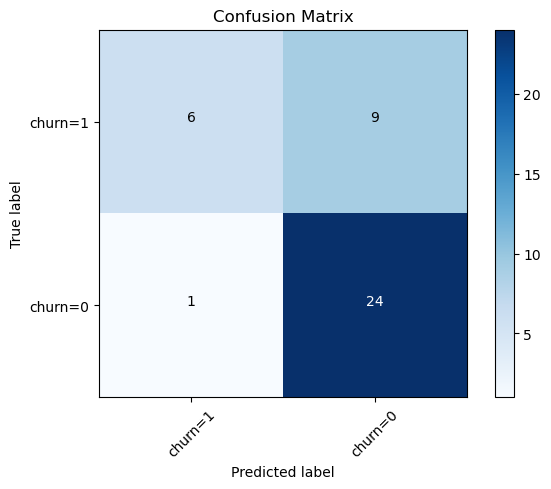

In [15]:
# computing confusion matrix
con_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# plot confusion matrix (not normalized)
plt.figure()
plot_confusion_matrix(con_matrix,
                      classes=['churn=1','churn=0'],
                      normalize=False,
                      title='Confusion Matrix')

We can interpret these values as true positives, false positives, true negatives, and false negatives.

#### Classification Report

In [16]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



- __Precision__ is the measure of the accuracy.
- __Recall__ is the true positive rate.
- __F1-Score__ is the harmonic average of precision and recall, 1 being the best possible value. 0 being the worst.

### Log Loss
Log loss measures accuracy for binary classification models.

In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

## Let's try building a new model
##### This time using a different optimizer and regularization values.

In [18]:
# C = inverse of regularization strength, smaller vals = stronger regularization
# solver = optimizer
LR = LogisticRegression(C=0.50,
                        solver='newton-cg'). fit(X_train, y_train)
LR

LogisticRegression(C=0.5, solver='newton-cg')

Predicting:

In [19]:
yhat = LR.predict(X_test)

In [20]:
yhat_prob = LR.predict_proba(X_test)

Evaluating with Log Loss:

In [21]:
log_loss(y_test, yhat_prob)

0.6183560927846214